In [1]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(model, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    from scipy.special import logit
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = logit(model.predict_proba(X)[:,1].reshape(xx1.shape))
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    return

In [ ]:
np.random.seed(0)

(300, 2)

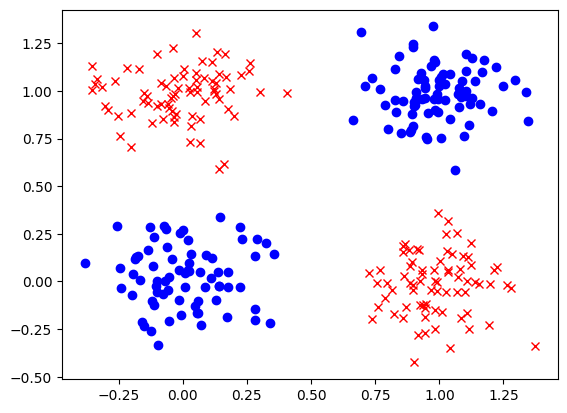

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)
X_train.shape

Train accuracy: 0.4866666666666667


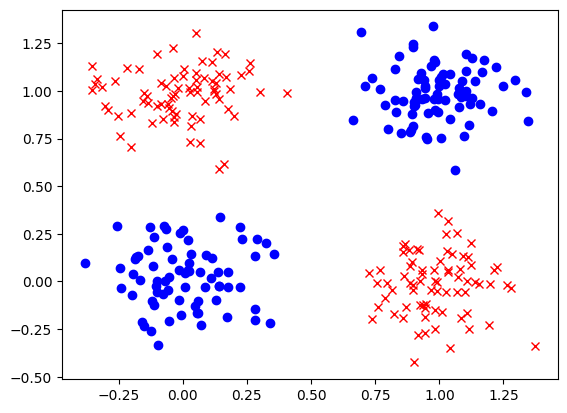

In [10]:
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import RidgeClassifier

#clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
#clf.fit(X_train, y_train)
#pred = clf.predict(X_test)

#model = MLPClassifier(hidden_layer_sizes=[10, 10], activation='relu', solver='sgd', alpha=0.001, learning_rate_init=0.001, max_iter=300)

model = RidgeClassifier(tol=1e-2, solver="sparse_cg")
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

print('Camandas:', model.n_layers_)
print('Ativação:', model.out_activation_)

Text(0.5, 0, 'iterations')

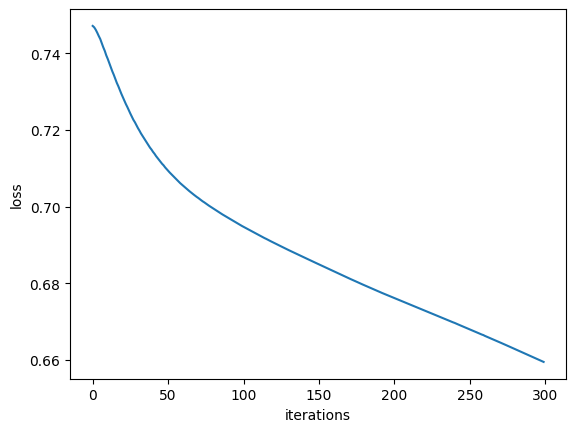

In [4]:
plt.plot(model.loss_curve_)
plt.ylabel('loss')
plt.xlabel('iterations')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 1.0
Camandas: 4
Ativação: logistic


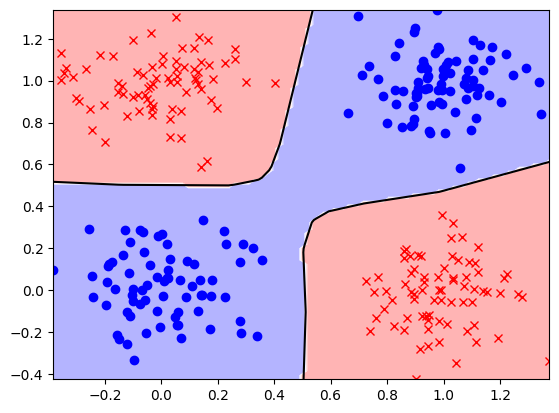

In [5]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[10, 10], activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.001, max_iter=300)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

print('Camandas:', model.n_layers_)
print('Ativação:', model.out_activation_)